## Ejercicio 3: Regresión Lasso y Regularización
Usaremos el dataset Boston Housing para predecir el valor mediano de las viviendas
(medv) utilizando Regresi´on Lasso.
URL: https://raw.githubusercontent.com/qlabpucp/datasets/main/datase//
boston.csv

### 3.1 Carga y preparación de datos

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

a) Cargue el dataset desde la URL en un DataFrame

In [16]:
url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"
df = pd.read_csv(url)
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


b) Explora la base de datos y realice una limpieza si en caso lo amerite

In [19]:
print("Dimensiones del dataset:", df.shape)
print(df.info())
print(df.describe())

# Verificar si existen valores nulos: No existen. No amerita mayor limpieza
print("Valores nulos:\n", df.isnull().sum())

Dimensiones del dataset: (506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB
None
       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000 

c) Separe los datos en predictores (X) y objetivo (y, la columna medv).

In [22]:
X = df.drop("medv", axis=1)
y = df["medv"]

d) Estandarice las características en X usando StandardScaler.

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 3.2. Implementación de Validación Cruzada con Lasso
a) Configure y entrene un objeto LassoCV con 10 pliegues (cv=10) y random state=42.

In [31]:
lasso_cv = LassoCV(cv=10, random_state=42)
lasso_cv.fit(X_scaled, y)

LassoCV(cv=10, random_state=42)

b) Imprima el valor óptimo de α encontrado.

In [34]:
print(f"Valor óptimo de α encontrado: {lasso_cv.alpha_:.5f}")

Valor óptimo de α encontrado: 0.08960


### 3.3. Interpretación del Gráfico Sesgo-Varianza
a) Genere el gráfico que muestra el MSE promedio vs. los valores de α (en escala logarítmica)).


b) Región de Overfitting (izquierda, α pequeño):
   - El MSE es bajo y relativamente plano.
   - En esta área, la regularización es débil o nula. El modelo tiene mucha libertad.
   - Si bien el error de entrenamiento (no observable en el gráfico) y el error de validación cruzada son bajos, estamos en riesgo de alta varianza (Overfitting).

c) Región de Underfitting (derecha, α grande):
   - El MSE aumenta drásticamente (sube de 34 a más de 90).
   - La regularización es demasiado fuerte, lo que impone una penalización excesiva a los coeficientes.
   - Esto simplifica el modelo en exceso, lo que resulta en alto sesgo (Underfitting). 
   



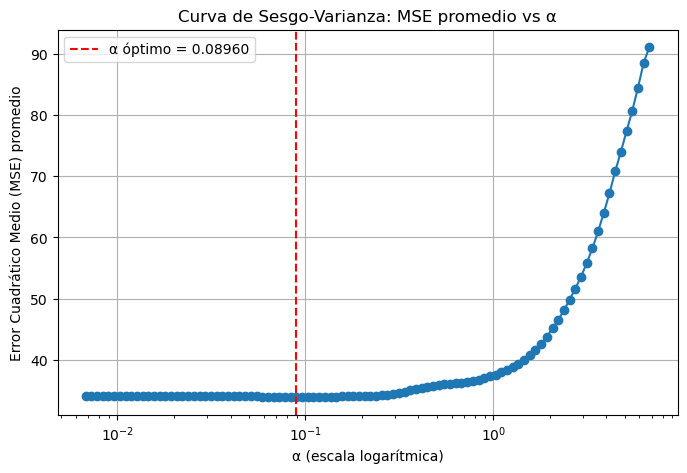

In [66]:
mse_path = lasso_cv.mse_path_.mean(axis=1)  # MSE promedio por valor de alpha
alphas = lasso_cv.alphas_

plt.figure(figsize=(8,5))
plt.plot(alphas, mse_path, marker='o')
plt.axvline(lasso_cv.alpha_, color='r', linestyle='--', label=f'α óptimo = {lasso_cv.alpha_:.5f}')
plt.xscale('log')
plt.xlabel('α (escala logarítmica)')
plt.ylabel('Error Cuadrático Medio (MSE) promedio')
plt.title('Curva de Sesgo-Varianza: MSE promedio vs α')
plt.legend()
plt.grid(True)
plt.show

print("""
b) Región de Overfitting (izquierda, α pequeño):
   - El MSE es bajo y relativamente plano.
   - En esta área, la regularización es débil o nula. El modelo tiene mucha libertad.
   - Si bien el error de entrenamiento (no observable en el gráfico) y el error de validación cruzada son bajos, estamos en riesgo de alta varianza (Overfitting).

c) Región de Underfitting (derecha, α grande):
   - El MSE aumenta drásticamente (sube de 34 a más de 90).
   - La regularización es demasiado fuerte, lo que impone una penalización excesiva a los coeficientes.
   - Esto simplifica el modelo en exceso, lo que resulta en alto sesgo (Underfitting). 
   
""")